<a href="https://colab.research.google.com/github/juwimana/Trading/blob/main/Stock_Purchase_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
#import packages
import datetime as dt
import pandas as pd
import pandas_datareader.data as data
from pandas_datareader._utils import RemoteDataError

#visualization packages
import seaborn as sns

#!pip install mplfinance
import mplfinance as mpf

#install python package yfinance
#!pip install yfinance
import yfinance as yf

#currency formatting
import locale 
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

In [254]:
start_date =dt.datetime(2020,10,1)
end_date = dt.date.today()
stock_data =''

#stock ticker
ticker = 'AMD'
stock = yf.Ticker(ticker)

In [255]:
#general stock prices
df_prices = yf.download(ticker, 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,83.059998,85.250000,82.860001,84.860001,84.860001,52177100
2020-10-02,82.580002,84.650002,81.660004,81.800003,81.800003,52855100
2020-10-05,82.550003,86.279999,82.550003,86.150002,86.150002,47056500
2020-10-06,86.209999,87.250000,83.540001,84.480003,84.480003,52725400
2020-10-07,86.099998,87.790001,85.650002,86.690002,86.690002,42951900


In [256]:
#get stock price historical data
h_stock = stock.history(period='max')
h_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2020-10-02,82.580002,84.650002,81.660004,81.800003,52855100,0,0.0
2020-10-05,82.550003,86.279999,82.550003,86.150002,47056500,0,0.0
2020-10-06,86.209999,87.250000,83.540001,84.480003,52725400,0,0.0


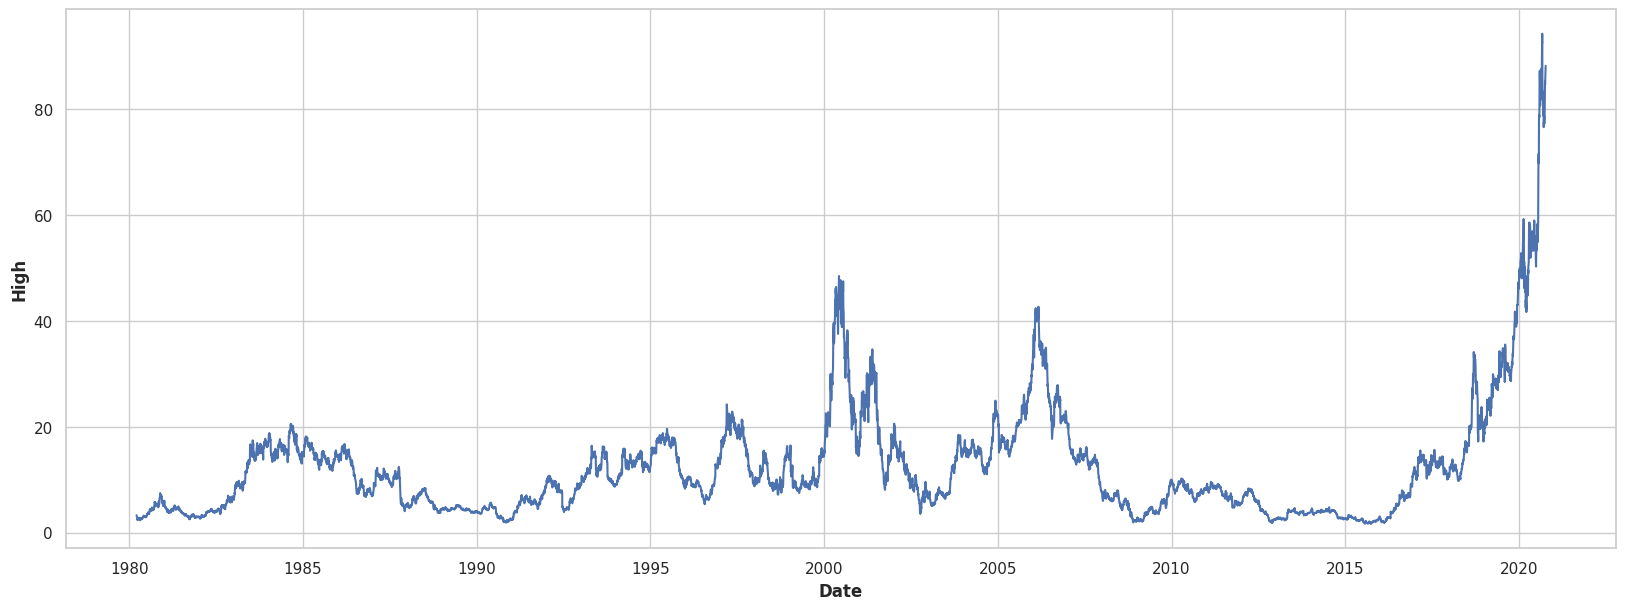

In [257]:
#plot historical data
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="whitegrid")
sns.lineplot(data=h_stock.High, palette='tab10')

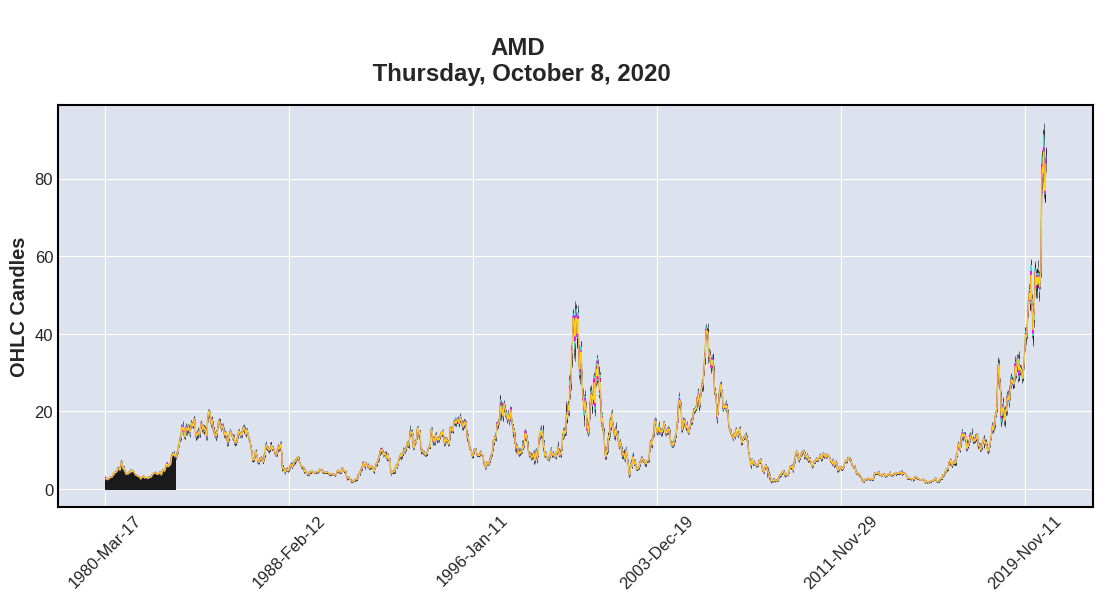

In [258]:
#plot stock historical data using mplfinance package
mpf.plot(h_stock,type='candle',mav=(3,6,9),volume=False, figratio=(25,10), 
         title='\n{}\n {}, {} {}, {}'.format(ticker,end_date.strftime('%A'), end_date.strftime("%B"), end_date.day, end_date.year),
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded'
         )

In [259]:
#incomplete url string
str_summary = 'https://finance.yahoo.com/quote/{}?p={}&.tsrc=fin-srch'
str_stat = 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'
str_analysis = 'https://finance.yahoo.com/quote/{}/analysis?p={}'
str_financials= 'https://finance.yahoo.com/quote/{}/financials?p={}'

#complete website url
url_summary = str_summary.format(ticker,ticker)
url_stat = str_stat.format(ticker,ticker)
url_analysis = str_analysis.format(ticker,ticker)
url_financials = str_financials.format(ticker,ticker)

print(url_summary)
print(url_stat)
print(url_analysis)
print(url_financials)

https://finance.yahoo.com/quote/AMD?p=AMD&.tsrc=fin-srch
https://finance.yahoo.com/quote/AMD/key-statistics?p=AMD
https://finance.yahoo.com/quote/AMD/analysis?p=AMD
https://finance.yahoo.com/quote/AMD/financials?p=AMD


In [260]:
#read ticker financial summary page
df_summary = pd.read_html(url_summary, header = 0)
df_summary

[  Previous Close          86.69
 0           Open          88.11
 1            Bid   87.17 x 1200
 2            Ask   87.03 x 2900
 3    Day's Range  86.46 - 88.22
 4  52 Week Range  28.00 - 94.28
 5         Volume        7027955
 6    Avg. Volume       62618356,
                  Market Cap                     101.826B
 0         Beta (5Y Monthly)                         2.29
 1            PE Ratio (TTM)                       168.73
 2                 EPS (TTM)                         0.51
 3             Earnings Date  Oct 27, 2020 - Nov 02, 2020
 4  Forward Dividend & Yield                    N/A (N/A)
 5          Ex-Dividend Date                 Apr 27, 1995
 6             1y Target Est                        78.64]

In [261]:
summary_2 = df_summary[0]
summary_2

,Previous Close,86.69
0,Open,88.11
1,Bid,87.17 x 1200
2,Ask,87.03 x 2900
3,Day's Range,86.46 - 88.22
4,52 Week Range,28.00 - 94.28
5,Volume,7027955
6,Avg. Volume,62618356


In [262]:
summary_1 = df_summary[1]
summary_1

,Market Cap,101.826B
0,Beta (5Y Monthly),2.29
1,PE Ratio (TTM),168.73
2,EPS (TTM),0.51
3,Earnings Date,"Oct 27, 2020 - Nov 02, 2020"
4,Forward Dividend & Yield,N/A (N/A)
5,Ex-Dividend Date,"Apr 27, 1995"
6,1y Target Est,78.64


In [263]:
#read ticker financial statistics page
df_stat = pd.read_html(url_stat, header =0)
df_stat

[                    Unnamed: 0  ... 9/30/2019
 0      Market Cap (intraday) 5  ...    32.29B
 1           Enterprise Value 3  ...    32.45B
 2                 Trailing P/E  ...    161.06
 3                Forward P/E 1  ...     28.17
 4  PEG Ratio (5 yr expected) 1  ...      0.99
 5            Price/Sales (ttm)  ...      5.40
 6             Price/Book (mrq)  ...     16.99
 7   Enterprise Value/Revenue 3  ...     18.02
 8    Enterprise Value/EBITDA 6  ...    148.16
 
 [9 rows x 6 columns],           Beta (5Y Monthly)     2.29
 0          52-Week Change 3  205.46%
 1   S&P500 52-Week Change 3   16.38%
 2            52 Week High 3    94.28
 3             52 Week Low 3    28.00
 4   50-Day Moving Average 3    81.79
 5  200-Day Moving Average 3    63.57,                               Avg Vol (3 month) 3  62.62M
 0                              Avg Vol (10 day) 3   51.1M
 1                            Shares Outstanding 5   1.17B
 2                                           Float   1.17B
 3  

In [264]:
len(df_stat)

10

In [265]:
stat_0 = df_stat[0]
stat_0

,Unnamed: 0,As of Date: 9/26/2020Current,6/30/2020,3/31/2020,12/31/2019,9/30/2019
0,Market Cap (intraday) 5,89.02B,61.76B,53.26B,53.66B,32.29B
1,Enterprise Value 3,88.14B,61.08B,52.48B,53.56B,32.45B
2,Trailing P/E,145.81,122.35,151.60,241.37,161.06
3,Forward P/E 1,45.45,52.63,39.84,43.48,28.17
4,PEG Ratio (5 yr expected) 1,1.31,1.55,1.66,1.55,0.99
5,Price/Sales (ttm),11.72,8.37,7.57,8.38,5.40
6,Price/Book (mrq),26.93,20.34,18.84,24.66,16.99
7,Enterprise Value/Revenue 3,11.53,31.61,29.39,25.18,18.02
8,Enterprise Value/EBITDA 6,85.57,238.59,202.63,180.94,148.16


In [266]:
stat_1 = df_stat[1]
stat_1

,Beta (5Y Monthly),2.29
0,52-Week Change 3,205.46%
1,S&P500 52-Week Change 3,16.38%
2,52 Week High 3,94.28
3,52 Week Low 3,28.00
4,50-Day Moving Average 3,81.79
5,200-Day Moving Average 3,63.57


In [267]:
stat_5 = df_stat[5]
stat_5

,Profit Margin,7.96%
0,Operating Margin (ttm),11.56%


In [268]:
stat_6 = df_stat[6]
stat_6

,Return on Assets (ttm),9.46%
0,Return on Equity (ttm),23.40%


In [269]:
stat_8 = df_stat[8]
stat_8

,Total Cash (mrq),1.78B
0,Total Cash Per Share (mrq),1.51
1,Total Debt (mrq),894M
2,Total Debt/Equity (mrq),27.05
3,Current Ratio (mrq),2.10
4,Book Value Per Share (mrq),2.82


In [270]:
#read ticker financial statistics page
df_analysis = pd.read_html(url_analysis, header =0)
df_analysis

[  Earnings Estimate  ...  Next Year (2021)
 0   No. of Analysts  ...             36.00
 1     Avg. Estimate  ...              1.66
 2      Low Estimate  ...              1.35
 3     High Estimate  ...              2.16
 4      Year Ago EPS  ...              1.10
 
 [5 rows x 5 columns],           Revenue Estimate  ... Next Year (2021)
 0          No. of Analysts  ...               36
 1            Avg. Estimate  ...           10.96B
 2             Low Estimate  ...            9.76B
 3            High Estimate  ...           11.96B
 4           Year Ago Sales  ...            8.92B
 5  Sales Growth (year/est)  ...           23.00%
 
 [6 rows x 5 columns],   Earnings History 9/29/2019 12/30/2019 3/30/2020 6/29/2020
 0         EPS Est.      0.18       0.31      0.18      0.16
 1       EPS Actual      0.18       0.32      0.18      0.18
 2       Difference         0       0.01         0      0.02
 3       Surprise %     0.00%      3.20%     0.00%    12.50%,           EPS Trend  ...  Next Y

In [271]:
analysis_5 = df_analysis[5]
analysis_5

,Growth Estimates,AMD,Industry,Sector(s),S&P 500
0,Current Qtr.,94.40%,NaN,NaN,NaN
1,Next Qtr.,21.90%,NaN,NaN,NaN
2,Current Year,71.90%,NaN,NaN,NaN
3,Next Year,50.90%,NaN,NaN,NaN
4,Next 5 Years (per annum),35.83%,NaN,NaN,NaN
5,Past 5 Years (per annum),39.81%,NaN,NaN,NaN


*   [Operating margin](https://www.investopedia.com/terms/o/operatingmargin.asp) is the profit a company makes on a dollar of sales after paying for variable costs but before paying any interest or taxes
*   [EPS](https://www.investopedia.com/terms/e/eps.asp) indicates how much money a company makes for each share of its stock
*   [Beta](https://www.investopedia.com/terms/b/beta.asp) is a measure of the volatility—or systematic risk—of a security or portfolio compared to the market as a whole
*   [Enterprise Value/EBITDA](https://www.investopedia.com/ask/answers/072715/what-considered-healthy-evebitda.asp#:~:text=The%20enterprise%2Dvalue%2Dto%2D,10%20are%20seen%20as%20healthy.) compares the value of a company—debt included—to the company’s cash earnings less non-cash expenses
*   [Return on equity (ROE)](https://www.investopedia.com/terms/r/returnonequity.asp) measures how effectively management is using a company’s assets to create profits
*   [Debt-to-Equity Ratio (D/E)](https://www.investopedia.com/terms/d/debtequityratio.asp) is a measure of the degree to which a company is financing its operations through debt versus wholly-owned funds

Note: GE stands for Growth Estimates per annum. For example, GE Next Year means growth estimates for next year.



In [272]:
#create stock key metrics DataFrame
stock_metrics= {
    'Company': stock.info.get('shortName'),
    'Ticker': ticker,
    'Sector': stock.info.get('sector'),
    'Market Cap': locale.currency(stock.info.get('marketCap'),grouping=True),
    '52 Week Low': stat_1.loc[3][1],
    '52 Week High': stat_1.loc[2][1],
    'EPS' : summary_1.loc[2][1],
    'Beta' : stock.info.get('beta'),
    'Enterprise Value/EBITDA': stat_0.loc[8][1],
    'Operating Margin': stat_5.loc[0][1],
    'ROE':stat_6.loc[0][1],
    'Debt-to-Equity': stat_8.loc[2][1],
    'GE Next Year': analysis_5.loc[3][1],
    'GE Next 5 Years': analysis_5.loc[4][1],
    'GE Past 5 Years': analysis_5.loc[5][1]
    }
stock_df = pd.DataFrame(data = stock_metrics, index = [0])
stock_df

,Company,Ticker,Sector,Market Cap,52 Week Low,52 Week High,EPS,Beta,Enterprise Value/EBITDA,Operating Margin,ROE,Debt-to-Equity,GE Next Year,GE Next 5 Years,GE Past 5 Years
0,"Advanced Micro Devices, Inc.",AMD,Technology,"$101,802,745,856.00",28.00,94.28,0.51,2.290678,85.57,11.56%,23.40%,27.05,50.90%,35.83%,39.81%
